# First EDA project
### Creator - Tamara Pallien, Data Science Bootcamp neueFische 

## The aim

The aim of this project is using exploratory data analysis (EDA) techniques and presentation of results to a stakeholder. In the first part EDA/statistical analysis will be used to get some information about the data. One information will be geographical. In the second part, several recommendations which meet the interests of your stakeholder will be presented.  


## The data

The King County Housing Data dataset contains information about home sales in King County (USA).
In this project the stakeholder 'Jacob Phillips' was chosen. He wants to buy a house in the Kind County area. He has unlimited budget, wants 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic and no waterfront.  

## Outline 

1) General investigation of the dataset
2) Filtering the dataset according to the stakeholder's taste 


# 1) General investigation of the dataset
For the initial investigation of the dataset, the workflow from Nimit Vanawat was used as kind of the template, since I really like the way he approaches this (https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). Of course, command lines and functions were not copied from his workflow, but rather used as a template for the data analysis of the herein used dataset. 

In [1]:
#Import all the required libraries
#load the dataset

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639


One can see that our dataset consists of 21 different columns that contain all the information about the different houses. What I next want to do is to find out if there are any missing values in the dataset. 

In [4]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

One can observe, that especially the 'waterfront' and the 'yr_renovated' columns contain a lot of zero values. This makes sense, because of lot of houses probably do not have a waterfront and have also not been renovated yet. 
We want to replace the NaN symbols with a '0' to not have problems later during the plotting. In this case it does not make sense to replace the NaN with for example mean values, since I just assume for simplicity, that NaN means that the house does not have a waterfront, have not been viewed or renovated. 

In [6]:
change_col = ['waterfront', 'view',  'yr_renovated']
for col in change_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(0, inplace=True)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now, one can see that for example in the 'waterfront' column the value at index No. 0 (first row) which initially showed us a NaN is now giving us a 0. 
As one of the first steps it makes sense to create a heatmap to get a feeling for which values might correlate to each other. 


<AxesSubplot:>

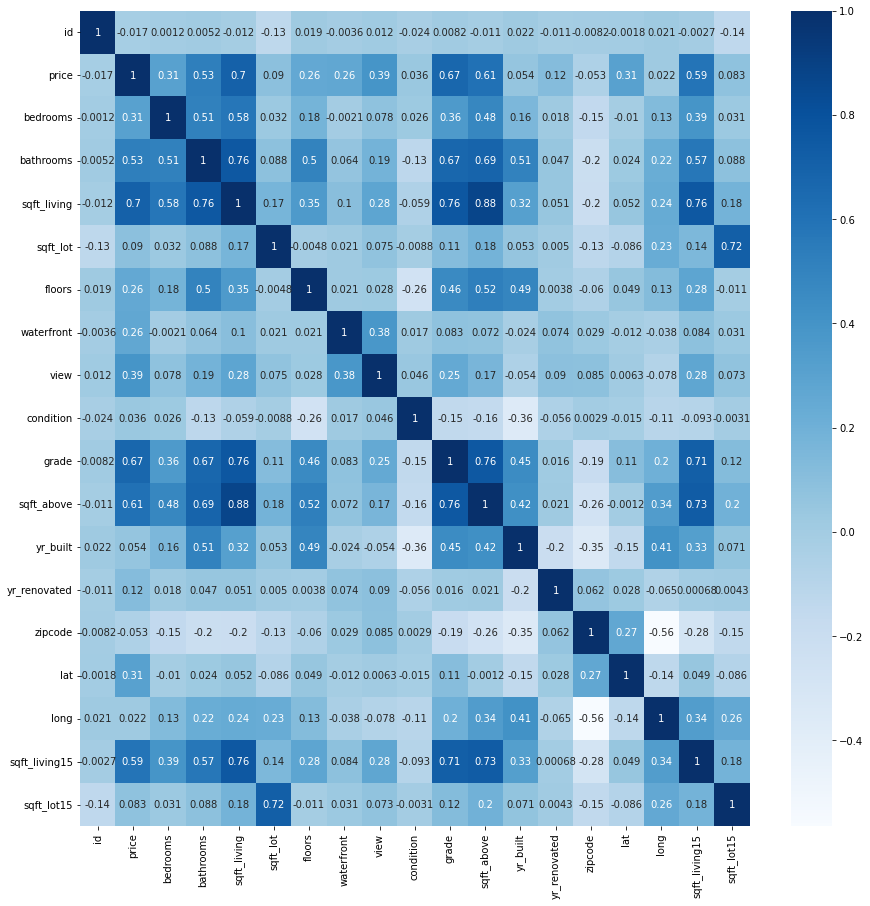

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

This heatmap shows the correlation between the different column values with the value 1 representing a 100% correlation. Some attributes that were expected to correlate indeed to correlate, like the lot size of a house correlates with the lot size of the neighbouring houses. Or the size of the above area correlates with the total living area. What might be interesting is also that the area of living is not necessarily related to the area of the whole lot. 
To check both findings we use a scatter plot. 

### Analyze if there is a correlation between house size, lot size and lot size of neighbours

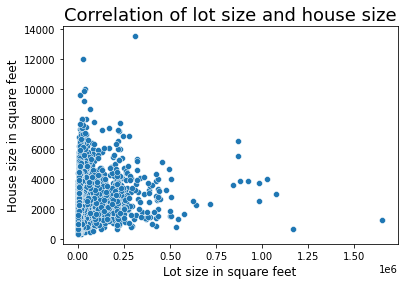

In [80]:
sns.scatterplot(data=df, x='sqft_lot', y='sqft_living')
plt.title('Correlation of lot size and house size', fontsize=18)
plt.xlabel('Lot size in square feet', fontsize = 12, )
plt.ylabel('House size in square feet', fontsize = 12);

This plot shows that also the smaller lots might have big house, which is slightly different from what I expected. This means, that for example having a big house with more than four bathrooms does not necessarily mean that there is enough space for a swimmimg pool and tennis court. We will later use the garden area alone without the size for the house to determine the treshold. 
In the next plot the correlation of lot size will be compared to that one of the houses nearby. This would indicate if it makes sense to focus on one area to search for houses, of if this is totally random. 

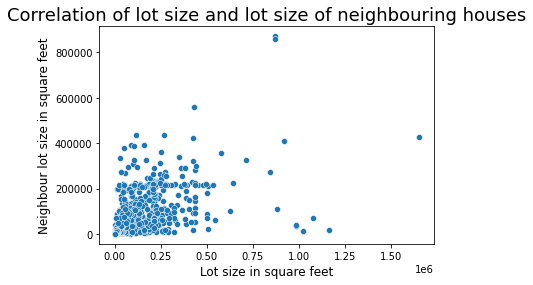

In [81]:
sns.scatterplot(data=df, x='sqft_lot', y='sqft_lot15')
plt.title('Correlation of lot size and lot size of neighbouring houses', fontsize=18)
plt.xlabel('Lot size in square feet', fontsize = 12, )
plt.ylabel('Neighbour lot size in square feet', fontsize = 12);

Indeed, this plot shows that there is some kind of correlation between the lot size of a house and the lot size of the neighbouring houses. This should be kept in mind when showing some house locations on the map. 

# 2) Filtering the dataset according to the stakeholder's taste 
After the initial investigation is done, now the more specific analysis and visualization part is following in order to find the perfect house for the stakeholder 'Jacob Phillips'. 
To meet the requirements of the client we need to conduct the following tasks: 
- the client is interested in a house with more than 4 bathrooms -> filter the dataset according to this criterium 
- he does not want a waterfront -> this is the second filter that needs to be applied 
- the lot has to be big -> determine a treshhold to fit the tennis court and swimming pool 
- the house should be historic -> again analyze this column to set the treshold. Also on this site (https://www.rocketmortgage.com/learn/buying-a-historic-home) a historic house is defined as being older than 50 years among other criteria. For simplicity only the age criteria is taken into account.

### Filter out all houses with a waterfront 
In this case we need to filter our dataset using the 'query' approach and only select the houses that do not have the waterfront (equals == 0). We will call the new dataframe 'df_no_water'.

In [12]:
df_no_water = df.query('waterfront == 0')
df_no_water.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639


### Filter out all houses with less or equal four bathrooms
The new dataframe will be called 'df_no_water_4'. 

In [14]:
#Next, the dataset is filtered based on the criteria with having more than 4 bathrooms. This will be achieved again with the query function using the dataset that do not contain waterfront houses any more. 
df_no_water_4 = df_no_water.query('bathrooms > 4')
df_no_water_4.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
270,4054500390,10/7/2014,1370000.000,4,4.750,5310,57346,2.000,0.000,0.000,...,11,5310,0.0,1989,0.000,98077,47.728,-122.042,4180,47443


So now after filtering for houses with no waterfront and with more than 4 bathrooms we still have 249 entries. As a last step we want to filter for the historic houses by applying the condition that the houses have to be older than 50 years. Based on the fact that we have year 2020 the building year of the house would need to be lower than 1970. 

### Only keep the houses that are considered as being historic
Do this based on the assumption that historic houses have to be older than 50 years. The new dataframe will be called 'df_no_water_4_historic'. 

In [15]:
df_no_water_4_historic = df_no_water_4.query('yr_built < 1970')
df_no_water_4_historic.sort_values('yr_built').head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
779,1954700695,6/12/2014,2250000.000,5,4.250,4860,9453,1.500,0.000,1.000,...,10,3100,1760.0,1905,0.000,98112,47.620,-122.286,3150,8557
5961,5249800010,12/3/2014,2730000.000,4,4.250,6410,43838,2.500,0.000,2.000,...,12,5610,800.0,1906,0.000,98144,47.570,-122.280,2270,6630


So we can see in this table that the oldest house was built in 1905. At the end we want to see how many potentially interesting houses we have left for the stakeholder. 

In [16]:
df_no_water_4_historic.shape

(45, 21)

### Conclusion of the second part
After we filtered out all the houses that are not attractive for the stakeholder based on his criteria, we now follow on with the analysis of the remaining houses. 
For this, we want to get an idea about the how to filter for the lot size. 

### Filter dataset for the size of the garden
Next, we need to analyse and filter the size of the lot. For this, the stakeholder specified that he wants to have a lot big enough to put a tennis court and a pool. The average size of a tennis court is around 2100 square feet. A medium sized swimming pool is around 600 square feed. So our garden needs to be at least 2700 square feet in size to match the stakeholders requirements. And of course than we there should still be some space left for putting other things like a terrace or garage.
First, we need to create a new column which only gives us the size of the garden. We call this new column garden. 
Than we want to see what garden size the remaining houses have and how many in which size category. For this we plot the garden size using a histogram.



In [17]:
#A new column will be created which is called garden and this one is the lot size subtracted by the size of the house. 
df_no_water_4_historic.eval('garden = sqft_lot - sqft_living', inplace = True)
df_no_water_4_historic.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,garden
779,1954700695,6/12/2014,2250000.000,5,4.250,4860,9453,1.500,0.000,1.000,...,3100,1760.0,1905,0.000,98112,47.620,-122.286,3150,8557,4593
1161,3876100320,9/5/2014,482500.000,6,4.500,2940,7500,1.500,0.000,0.000,...,2940,0.0,1966,0.000,98034,47.721,-122.182,2010,7500,4560


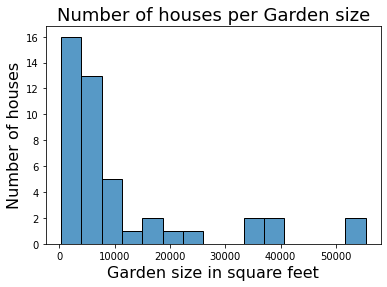

In [79]:
#To plot the size of the garden and the frequency per category we use a histogram

sns.histplot(df_no_water_4_historic.garden,bins=15)
plt.title('Number of houses per Garden size', fontsize=18)
plt.xlabel('Garden size in square feet', fontsize=16)
plt.ylabel('Number of houses', fontsize=16);

Based on the distribution and the possibility of having enough space for a swimming pool and a tennis court, the dataset was further filtered for the size of the garden. Therefore we select all houses that have a lot bigher than 5000 square feet. To have even a bit extra space for a terrace or so.

In [26]:
df_no_water_4_historic_garden = df_no_water_4_historic.query('garden > 5000')
df_no_water_4_historic_garden.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,garden
2038,9471200200,3/25/2015,2530000.000,4,4.250,5040,16048,1.000,0.000,3.000,...,3420,1620.0,1950,0.000,98105,47.670,-122.260,3960,14000,11008
3018,3377900195,9/29/2014,2530000.000,4,5.500,6930,45100,1.000,0.000,0.000,...,4310,?,1950,1991.000,98006,47.555,-122.144,2560,37766,38170


So before showing the houses in a geographic map, we want to find out if these houses are clustered certain areas (which are zip codes). So we plot the count for the houses together with the zip codes. 

In [69]:
#For this we calculate the average garden size and plot this by zipcode 
df_garden_mean = df_no_water_4_historic_garden[['garden', 'zipcode']].groupby('zipcode').mean().reset_index()
df_garden_mean['zipcode'] = df_garden_mean['zipcode'].astype(str)
df_garden_mean

,zipcode,garden
0,98003,55154.000
1,98004,6802.500
2,98006,22831.000
3,98028,7300.000
4,98031,22024.000
5,98040,9653.500
6,98102,15550.000
7,98105,11008.000
8,98112,11440.333
9,98119,5808.000


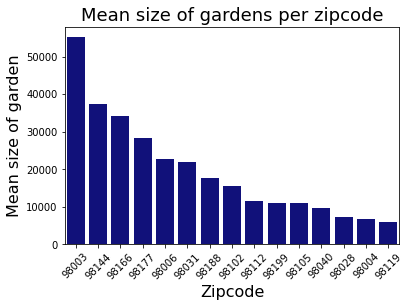

In [92]:
sns.barplot(data = df_garden_mean, x="zipcode", y="garden", color = 'darkblue', order = df_garden_mean.sort_values('garden', ascending = False).zipcode)

plt.title('Mean size of gardens per zipcode', fontsize=18)
plt.xlabel('Zipcode', fontsize=16)
plt.ylabel('Mean size of garden', fontsize=16)
plt.xticks(rotation = 45);

So we can conclude from this plot that in the Zipcode 98003 the size of the garden is highest. Next come Zipcodes 98144 and 98166. We will hopefully see later if this is true. 